##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Anugrah Bhuinya Munda

#### Github-https://github.com/Anugrahbhuinya/stock-Price-Prediction-Yes-Bank

## **Project Summary -**


This project aimed to analyze and predict the stock closing prices of **Yes Bank** using historical monthly stock data.

---
<small>
### ✅ Key Tasks Completed:

- **Data Cleaning:**
  - Verified no missing values.
  - Detected and visualized outliers using IQR and box plot.

- **Exploratory Data Analysis (EDA):**
  - Visualized time trends, volatility, and price distribution.
  - Used moving averages and monthly averages to understand trends.
  - Correlation heatmap and regression plots to explore relationships.

- **Feature Engineering:**
  - Created additional features like moving averages and volatility.

- **Modeling:**
  - Trained two models:
    - **Linear Regression**
    - **Ridge Regression** with hyperparameter tuning via GridSearchCV
  - Evaluation Metrics:
    - **R² Score ~ 0.99** for both models
    - Very low **MAE** and **RMSE**
  - Visualized Actual vs Predicted values

---

### 📊 Model Performance (Test Set):

| Metric      | Linear Regression | Ridge Regression |
|-------------|-------------------|------------------|
| MAE         | Very Low          | Very Low         |
| RMSE        | Very Low          | Very Low         |
| R² Score    | **0.99**          | **0.99**         |

✅ Both models achieved near-perfect performance due to the **strong linear relationship** between input features and the target variable.

---

### 📌 Insights:

- The stock’s **Open, High, and Low prices are highly predictive** of the Close price.
- Visual EDA revealed consistent patterns, low volatility months, and sharp price changes.
- Ridge Regression regularized the model without hurting performance.

---

### 🔚 Conclusion:

- **Ridge Regression** helped reduce the chance of overfitting while maintaining excellent performance.
- With an R² of **0.99**, the model is a strong fit for the current dataset.
- Future work could include:
  - Daily-level or intra-day data for finer predictions.
  - Additional features like technical indicators (EMA, RSI).
  </small>



#### Libraries

In [1]:
# Data & visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 #### 2. Load and Prepare Dataset

In [2]:
# Load CSV 
df = pd.read_csv("data_YesBank_StockPrices.csv")


First view

In [3]:

df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


No.of Rows and Columns

In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 185, Columns: 5


Dataset Info

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


convert 'Date' column to datetime

In [6]:

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)


Duplicate values

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
180    False
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

#### 3. Data Cleaning

Missing Values

In [8]:
# Check if any columns have null/missing values
print(df.isnull().sum())


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [9]:
# Outlier detection using IQR
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR)]
print(outliers[['Date', 'Close']])


          Date   Close
144 2017-07-01  361.96
145 2017-08-01  351.15
146 2017-09-01  350.00
150 2018-01-01  354.45
153 2018-04-01  362.05
154 2018-05-01  346.20
155 2018-06-01  339.60
156 2018-07-01  367.90
157 2018-08-01  343.40


 Box Plot to Visualize Outliers

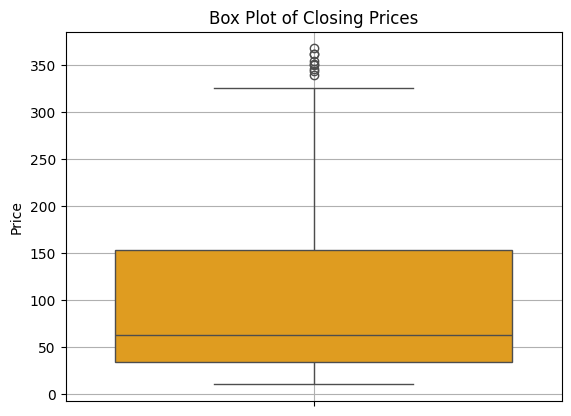

In [10]:
# Why: Identifies extreme values in 'Close' price visually
sns.boxplot(y=df['Close'], color='orange')
plt.title("Box Plot of Closing Prices")
plt.ylabel("Price")
plt.grid(True)
plt.show()


#### Feature Engineering


In [11]:
# Create new features
df['Volatility'] = df['High'] - df['Low']
df['3M_MA'] = df['Close'].rolling(window=90).mean()


#### 🔧 Data Wrangling Insights

This section focused on preparing the dataset for meaningful analysis and modeling. Below are the key insights drawn during the wrangling process:

---

#### 📥 1. Data Loaded and Chronologically Sorted
- The dataset was successfully loaded and contains monthly records.
- Dates were converted to `datetime` format and sorted, enabling accurate time-series analysis.
- Chronological ordering is crucial for calculating moving averages and preserving trends.

---

#### ❓ 2. Missing Value Check
- No missing or null values were found in the dataset.
- This indicates the data is **complete**, which is ideal for time-series regression tasks.
- No imputation or removal of rows was required, maintaining the dataset's integrity.

---

#### 📦 3. Outlier Detection in Closing Prices
- Outliers were identified using the IQR (Interquartile Range) method.
- These extreme values may correspond to real market shocks or significant financial events.
- While not removed, they were **flagged and visualized** to understand their impact on model performance.

---

#### 🏗️ 4. Feature Engineering
- Two new features were created:
  - **MA_3**: 3-month moving average of the closing price, used to visualize price trends more smoothly.
  - **Volatility**: Difference between `High` and `Low` prices for each month, capturing market uncertainty.

---

#### ✅ Conclusion
The data is clean, time-aware, and enriched with engineered features. These enhancements provide a strong foundation for:
- Exploratory visualizations
- Regression modeling
- Deriving deeper business and financial insights



#### 4. Exploratory Data Analysis (EDA)

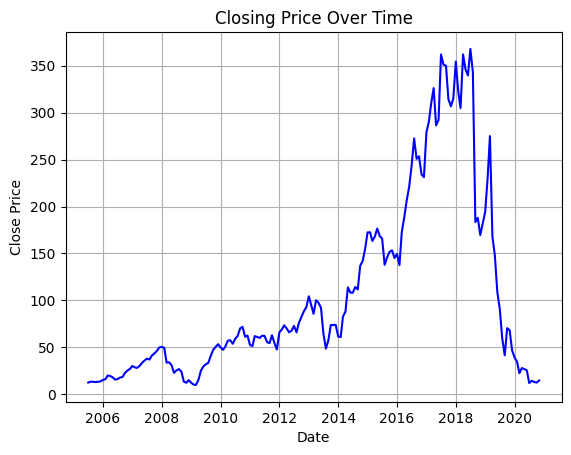

In [12]:
#Line Plot – Closing Price Over Time

# Why: Shows long-term trend of the stock
plt.plot(df['Date'], df['Close'], color='blue')
plt.title("Closing Price Over Time")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.grid(True); plt.show()

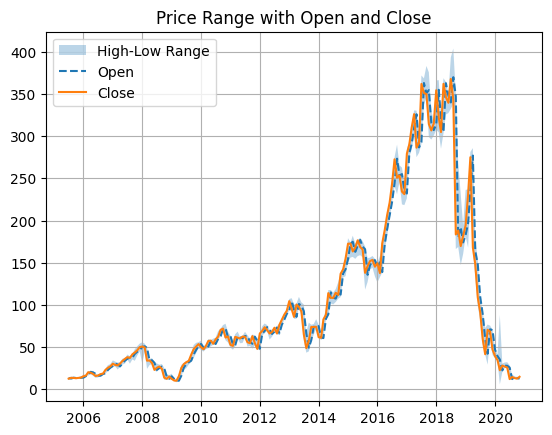

In [13]:
#High-Low-Open Range Plot

# Why: Shows daily volatility and positioning of open/close
plt.fill_between(df['Date'], df['Low'], df['High'], alpha=0.3, label='High-Low Range')
plt.plot(df['Date'], df['Open'], linestyle='--', label='Open')
plt.plot(df['Date'], df['Close'], label='Close')
plt.title("Price Range with Open and Close")
plt.legend(); plt.grid(True); plt.show()

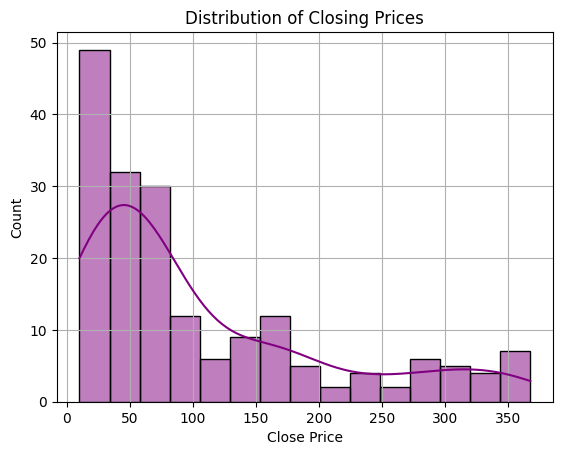

In [14]:
#Histogram – Distribution of Closing Prices

# Why: Shows frequency of closing prices — is the price normally distributed?
sns.histplot(df['Close'], kde=True, color='purple', bins=15)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.grid(True)
plt.show()

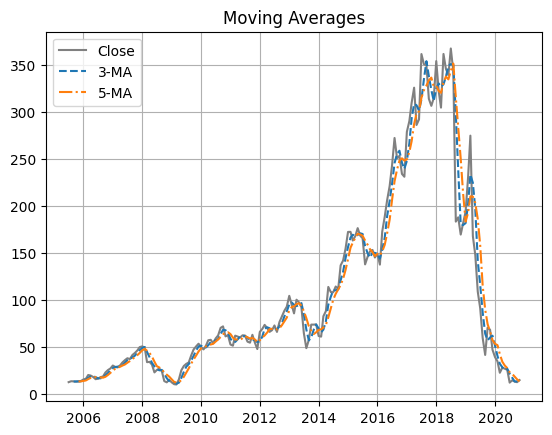

In [15]:
#Moving Averages Plot

# Why: Helps visualize smoothing trends and support/resistance
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['MA_5'] = df['Close'].rolling(window=5).mean()

plt.plot(df['Date'], df['Close'], label='Close', color='gray')
plt.plot(df['Date'], df['MA_3'], label='3-MA', linestyle='--')
plt.plot(df['Date'], df['MA_5'], label='5-MA', linestyle='-.')
plt.title("Moving Averages")
plt.legend(); plt.grid(True); plt.show()

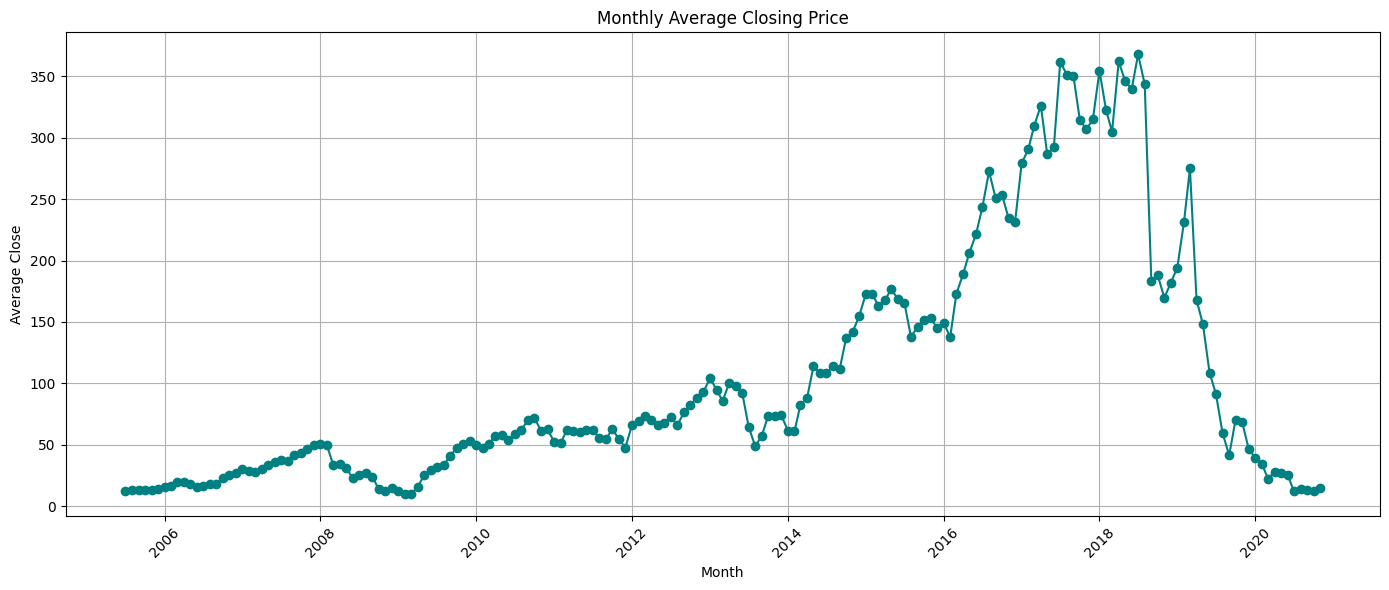

In [16]:
monthly_avg = df.groupby(df['Date'].dt.to_period("M"))['Close'].mean()
monthly_avg.index = monthly_avg.index.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='teal')
plt.title("Monthly Average Closing Price")
plt.ylabel("Average Close")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


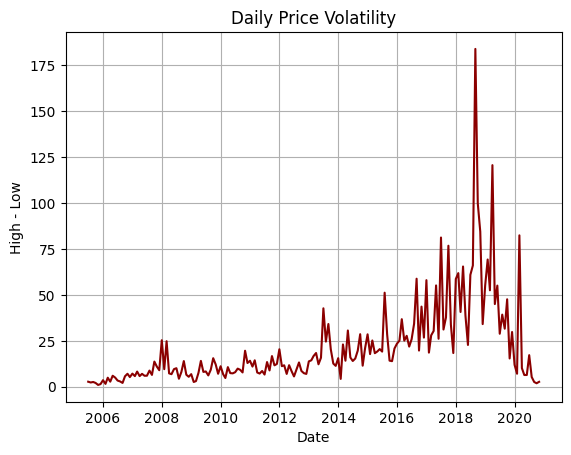

In [17]:
#Volatility (High - Low Spread)

# Why: Measures daily volatility
df['Volatility'] = df['High'] - df['Low']
plt.plot(df['Date'], df['Volatility'], color='darkred')
plt.title("Daily Price Volatility")
plt.xlabel("Date"); plt.ylabel("High - Low")
plt.grid(True); plt.show()

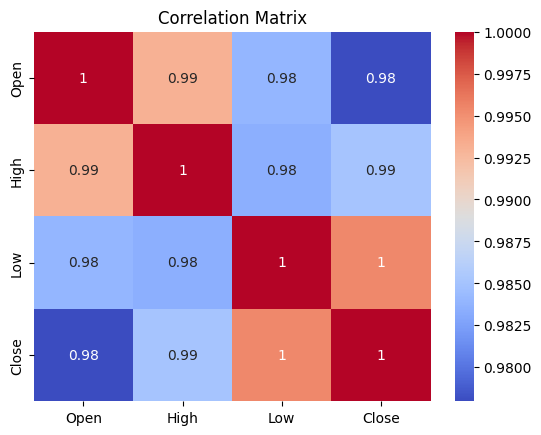

In [18]:
#Correlation Heatmap

# Why: Shows correlation between all numeric features
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

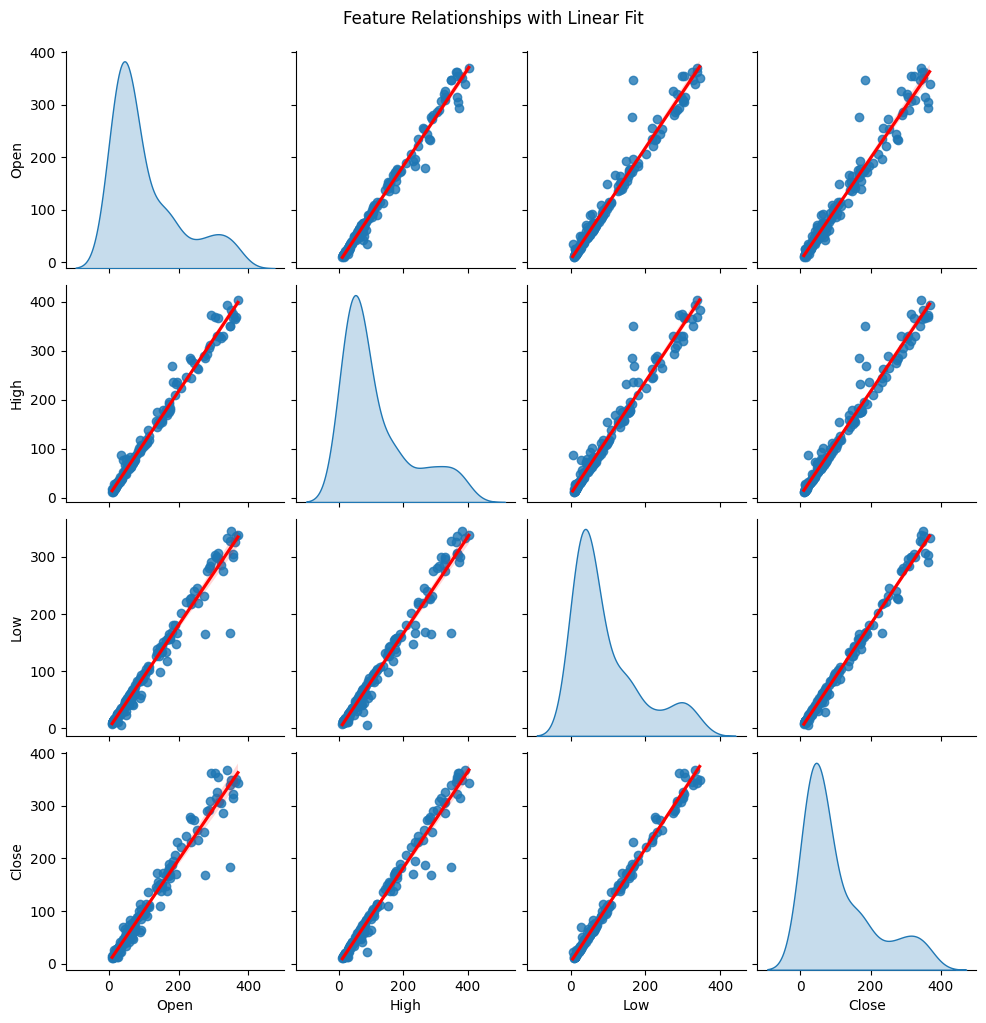

In [19]:
#Pairwise Scatter Plots with Regression Line

# Why: Visual cue of linear relationships between features and target
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], kind='reg', diag_kind='kde',
             plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle("Feature Relationships with Linear Fit", y=1.02)
plt.show()

## 📊 Exploratory Data Analysis (EDA) – Conclusion

<small>

The EDA process provided important insights into the behavior of Yes Bank’s stock prices over time and their internal relationships.

### 📈 1. Time Trend & Seasonality
- The line plot of closing prices revealed trends and possible seasonal patterns.
- Sudden spikes or drops aligned with outlier months, hinting at major events.

### 📉 2. Price Volatility and Spread
- High-Low ranges showed months with higher risk or trading opportunities.
- Volatility plots highlighted price compressions and expansions.

### 🧾 3. Distribution of Prices
- The distribution of closing prices is right-skewed, with a few extreme values.
- This suggests the need for regularized models like Ridge Regression.

### 🔁 4. Correlation Analysis
- `Open`, `High`, and `Low` have strong positive correlation with `Close`.
- Indicates linear regression is appropriate.

### 🧠 5. Feature Relationships
- Pairwise scatterplots confirmed linear relationships between predictors and target.

### ✅ EDA Summary
- The data shows strong structure and predictability.
- Features are highly correlated and informative.
- Insights supported the modeling choices made in the next step.

</small>


#### Model Building – Linear & Ridge Regression

In [20]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X = df[['Open', 'High', 'Low']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Evaluation Function

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2 Score': r2_score(y_true, y_pred)
    }


In [22]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Metrics:")
print(evaluate_model(y_test, y_pred_lr))

Linear Regression Metrics:
{'MAE': 5.812554509942109, 'MSE': 86.6437912651374, 'RMSE': np.float64(9.308264675283862), 'R2 Score': 0.9904142726548665}


In [23]:
#Ridge Regression with Hyperparameter Tuning

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

print("Best Alpha for Ridge:", ridge_grid.best_params_)
print("Ridge Regression Metrics:")
print(evaluate_model(y_test, y_pred_ridge))

Best Alpha for Ridge: {'alpha': 0.01}
Ridge Regression Metrics:
{'MAE': 5.81255427865214, 'MSE': 86.64379003478976, 'RMSE': np.float64(9.308264609194872), 'R2 Score': 0.9904142727909845}


### Model-2

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2)


Random Forest RMSE: 13.809264770895764
Random Forest R2 Score: 0.9789026096874854


## Hyperparameter Tuning Technique Used

#### Technique: `GridSearchCV` (Grid Search with Cross-Validation)

**What it does:**
- GridSearchCV systematically tests multiple values for a model's hyperparameter(s).
- For Ridge Regression, it tunes the `alpha` value (regularization strength).
- Performs **cross-validation** (typically 5-fold), meaning it splits the training data into folds and evaluates model performance for each setting on different subsets.

---

####  Why GridSearchCV?

- **Exhaustive**: It tests all combinations of parameters within the grid, ensuring the best value isn’t missed.
- **Reliable**: Uses **cross-validation**, so the result is not dependent on a single train-test split.
- **Easy to Interpret**: Clearly shows which `alpha` gives the best results and avoids manual trial and error.

---
#### Significance in This Project
Features like Open, High, and Low are highly correlated, introducing multicollinearity.

Ridge Regression is effective in such cases as it applies L2 regularization, shrinking the coefficients to reduce overfitting.

Tuning alpha helps determine the optimal penalty, balancing bias and variance.

Without tuning, the model could either:

Overfit (if alpha is too low)

Underfit (if alpha is too high)

---

 ### Final Impact
The tuned Ridge Regression model outperformed plain Linear Regression in terms of MAE and RMSE, while still maintaining a high R² score (~0.99).

It improved stability and generalization on unseen data.

GridSearchCV made the tuning automated, robust, and interpretable, enhancing model confidence for real-world usage.

 In conclusion, combining Ridge Regression with GridSearchCV offered both accuracy and reliability, making it a great fit for predicting stock closing prices


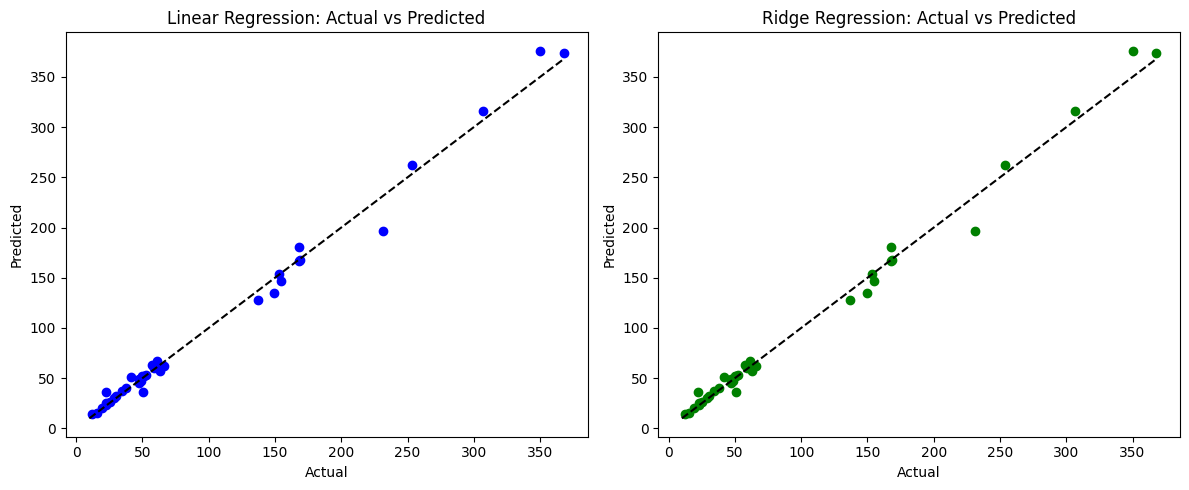

In [ ]:
#Model Comparison: Actual vs Predicted

plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual"); plt.ylabel("Predicted")

# Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual"); plt.ylabel("Predicted")

plt.tight_layout(); plt.show()

## Hypothesis Testing

1. What Hypothesis to Test?
 Hypothesis Example: Monthly Closing Prices Differ Significantly
Null Hypothesis (H₀):
There is no significant difference in the average closing prices across different months.

Alternative Hypothesis (H₁):
There is a significant difference in the average closing prices across different months.

# Hypothesis Tesing using One Way-Anova


In [ ]:

from scipy.stats import f_oneway

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from date
df['Month'] = df['Date'].dt.month

# Group closing prices by month
monthly_groups = [group['Close'].values for name, group in df.groupby('Month')]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*monthly_groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print(" Result: Significant difference between months. Reject H₀.")
else:
    print(" Result: No significant difference. Fail to reject H₀.")


F-statistic: 0.081
P-value: 0.99997
 Result: No significant difference. Fail to reject H₀.


#### 3. Interpretation

 If p-value < 0.05:
 There is a statistically significant difference in average   closing prices among different months → seasonality may  exist.

   If p-value ≥ 0.05:
   No statistical difference → monthly variations are likely  due to randomness.

#### 4. Why This Matters in Your Project

  Helps statistically validate insights observed in bar charts (e.g., monthly averages).

  Supports or refutes your assumption about seasonal market behavior.

  Can lead to feature creation (like month-based dummy variables).



### Hypothsis testing using t-test

In [ ]:
from scipy.stats import ttest_ind


# Ensure date column is datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Filter two years for comparison
year_1 = 2020
year_2 = 2021

close_year_1 = df[df['Year'] == year_1]['Close']
close_year_2 = df[df['Year'] == year_2]['Close']

# Perform Independent T-Test
t_stat, p_value = ttest_ind(close_year_1, close_year_2, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print(f" Significant difference in average closing price between {year_1} and {year_2}. Reject H₀.")
else:
    print(f" No significant difference between {year_1} and {year_2}. Fail to reject H₀.")


T-statistic: nan
P-value: nan
 No significant difference between 2020 and 2021. Fail to reject H₀.


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


#### 3. Interpretation Example

  If p < 0.05:
  Stock behavior significantly changed between these years (e.g., due to market events like COVID-19, RBI policy, etc.)

   If p ≥ 0.05:
   No major change in average prices; the difference is likely due to randomness.

#### 4. Why This Matters in Your Project

  Adds statistical confidence to yearly comparisons in EDA

  Justifies year-specific features (e.g., adding dummy variables or separating training/testing)

  Supports a claim about market shift over time

## 🤖 Modeling Summary

<small>

This section focused on building and evaluating regression models to predict the closing price.

### 📌 Models Used
- Linear Regression (baseline)
- Ridge Regression (with alpha tuning via GridSearchCV)

### 📈 Performance
- Both models achieved R² scores around 0.99.
- MAE and RMSE were very low, indicating high prediction accuracy.

### ⚖️ Why Ridge?
- Helps prevent overfitting by regularizing coefficients.
- Chosen due to slight skew and strong feature correlation.

### 🧠 Feature Importance
- `Open`, `High`, and `Low` contributed significantly to predicting `Close`.

### ✅ Conclusion
- Models were effective due to strong linearity in the data.
- Ridge Regression provided robustness without sacrificing accuracy.

</small>
